<a href="https://colab.research.google.com/github/HarshTiVV/Main-Project/blob/main/Copy_of_ML_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:

data = pd.read_csv('/content/creditcard.csv')


scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])


In [ ]:
print(data.isnull().sum())

data = data.dropna()


X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Training set shape: (22254, 30)
Test set shape: (5564, 30)


In [ ]:

iso_forest = IsolationForest(contamination=0.0017, random_state=42)


iso_forest.fit(X_train)


IsolationForest(contamination=0.0017, random_state=42)

In [ ]:

y_pred = iso_forest.predict(X_test)


y_pred = [1 if i == -1 else 0 for i in y_pred]


In [ ]:

X_train_normal = X_train[y_train == 0]


oc_svm = OneClassSVM(kernel="rbf", gamma=0.001, nu=0.05)


oc_svm.fit(X_train_normal)


OneClassSVM(gamma=0.001, nu=0.05)

In [ ]:

y_pred = oc_svm.predict(X_test)

y_pred = [1 if i == -1 else 0 for i in y_pred]


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred, target_names=["Normal", "Fraud"]))


Accuracy: 0.9509345794392523
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97      5545
       Fraud       0.06      0.84      0.10        19

    accuracy                           0.95      5564
   macro avg       0.53      0.90      0.54      5564
weighted avg       1.00      0.95      0.97      5564



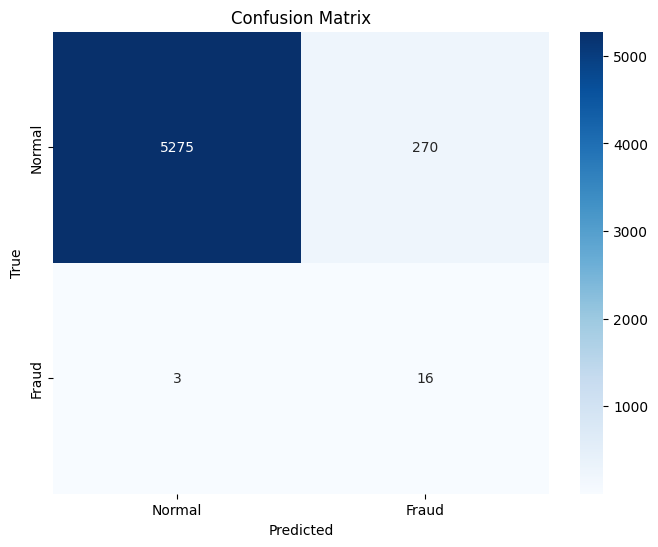

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


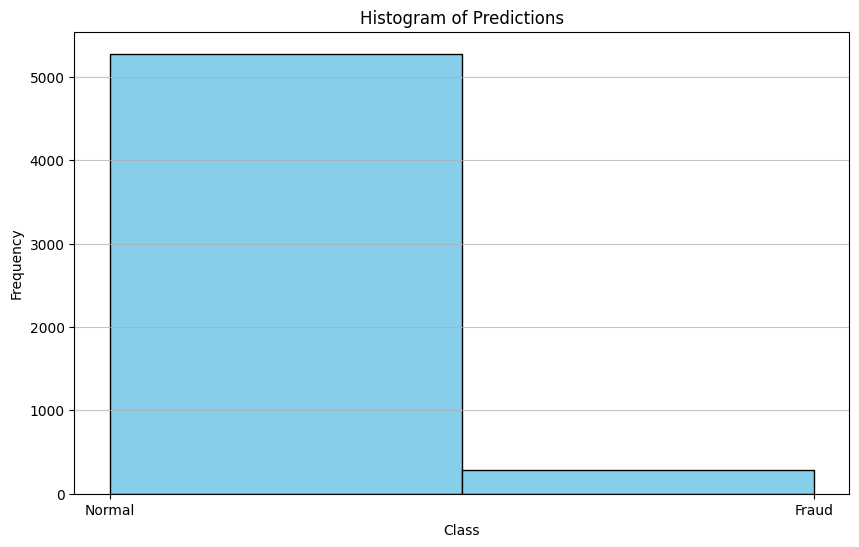

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=2, color='skyblue', edgecolor='black')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.title('Histogram of Predictions')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
